<a href="https://colab.research.google.com/github/Praneethsai05/Praneethsai05.github.io/blob/master/MiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os 
import matplotlib.pyplot as plt 
import numpy as np
from skimage.io import imread 
from skimage.transform import resize

target =[] 
images=[] 
flat_data=[]

DATADIR='/content/drive/MyDrive/kaggle_dataset' 
CATEGORIES=['birds','flowers','fruits']

for category in CATEGORIES: 
  class_num= CATEGORIES.index(category) 
  path=os.path.join(DATADIR,category) 
  for img in os.listdir(path): 
    img_array=imread(os.path.join(path,img)) 
    img_resized=resize(img_array,(150,150,3)) 
    flat_data.append(img_resized.flatten()) 
    images.append(img_resized) 
    target.append(class_num)

flat_data=np.array(flat_data)
target=np.array(target)
images=np.array(images)


In [2]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [3]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(flat_data,target,test_size=0.33,random_state=44)

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid=[
            {'C':[1,10,100,1000],'kernel':['linear']},
            {'C':[1,10,100,1000],'gamma':[0.10,0.0001],'kernel':['rbf']},
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.1, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [5]:
y_pred=clf.predict(x_test)
y_pred

array([2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 1, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 0,
       1, 2, 0, 2, 1, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0,
       0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 1, 1, 2, 1, 2, 2, 2, 2, 0, 2,
       2, 2, 0, 2, 2, 2, 2, 2])

In [7]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [8]:
accuracy_score(y_pred,y_test)

0.8389830508474576

In [9]:
confusion_matrix(y_pred,y_test)

array([[15,  3,  3],
       [ 2,  6,  1],
       [ 0, 10, 78]])

In [10]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [11]:
model=pickle.load(open('img_model.p','rb'))

Enter the URLhttps://upload.wikimedia.org/wikipedia/commons/2/2f/Culinary_fruits_front_view.jpg
(2540, 3818, 3)
PREDICTED OUTPUT:flowers


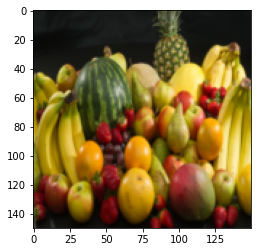

In [15]:
.flat_data=[]
url=input('Enter the URL')
img=imread(url)
img_resized=resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data= np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out=model.predict(flat_data)
y_out=CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT:{y_out}')